##  Using API (Scikit-Learn)

### Linealy seperable Problem

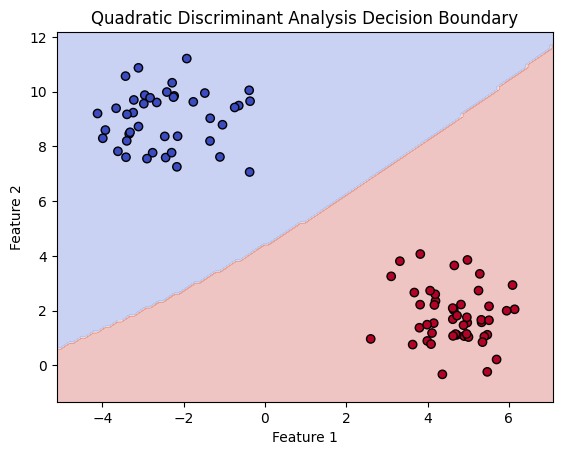

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generate synthetic data
np.random.seed(42)
# Generate synthetic data
np.random.seed(42)
X,y = make_blobs(n_samples=300, n_features=2,
                 centers=2,
                 cluster_std=1.0,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=42,
                 return_centers=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Quadratic Discriminant Analysis Decision Boundary')
    plt.show()

# Plotting decision boundary and class distributions
plot_decision_boundary(qda, X_test, y_test)

### Non-linearly Seperable Problem

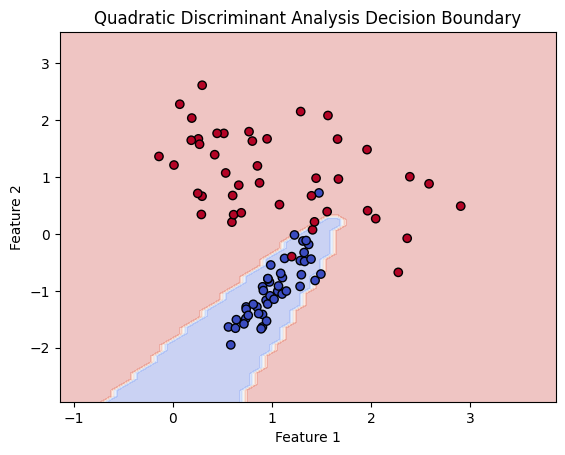

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generate synthetic data
np.random.seed(42)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Quadratic Discriminant Analysis Decision Boundary')
    plt.show()

# Plotting decision boundary and class distributions
plot_decision_boundary(qda, X_test, y_test)


## Using custom implementation

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mean, covariance):
    n = len(mean)
    coeff = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(covariance) ** 0.5)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    return coeff * np.exp(exponent)

class GaussianDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.covariances = []

        for i, c in enumerate(self.classes):
            class_data = X[y == c]
            self.class_priors[i] = len(class_data) / len(X)
            self.means[i] = np.mean(class_data, axis=0)
            self.covariances.append(np.cov(class_data, rowvar=False))

    def predict(self, X):
        predictions = []

        for x in X:
            class_probs = []

            for i, c in enumerate(self.classes):
                prior = np.log(self.class_priors[i])
                likelihood = np.log(gaussian_pdf(x, self.means[i], self.covariances[i]))
                class_probs.append(prior + likelihood)

            predictions.append(self.classes[np.argmax(class_probs)])

        return np.array(predictions)

    def plot_distribution(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', label='Data Points')

        for i, c in enumerate(self.classes):
            plt.scatter(self.means[i, 0], self.means[i, 1], c='red', marker='x', s=100, label=f'Mean (Class {c})')

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

            # Calculate the probability density for each point in the meshgrid
            xy_points = np.column_stack((xx.ravel(), yy.ravel()))
            Z = np.array([gaussian_pdf(xy, self.means[i], self.covariances[i]) for xy in xy_points])
            Z = Z.reshape(xx.shape)

            # Use brighter color for class 0
            contour_color = 'blue' if i == 0 else 'red'

            plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.Blues if i == 0 else plt.cm.Reds, alpha=0.5)

        # Plot the decision boundary
        Z0 = np.array([gaussian_pdf(xy, self.means[0], self.covariances[0]) for xy in xy_points])
        Z1 = np.array([gaussian_pdf(xy, self.means[1], self.covariances[1]) for xy in xy_points])
        Z = np.log(Z1) - np.log(Z0) + np.log(self.class_priors[1]) - np.log(self.class_priors[0])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Gaussian Discriminant Analysis with Class Distributions')

        # Create a legend manually
        legend_labels = [f'Class {c} Distribution' for c in self.classes]
        plt.legend(legend_labels, loc='upper right')

        plt.show()



### Linearly seperable problem

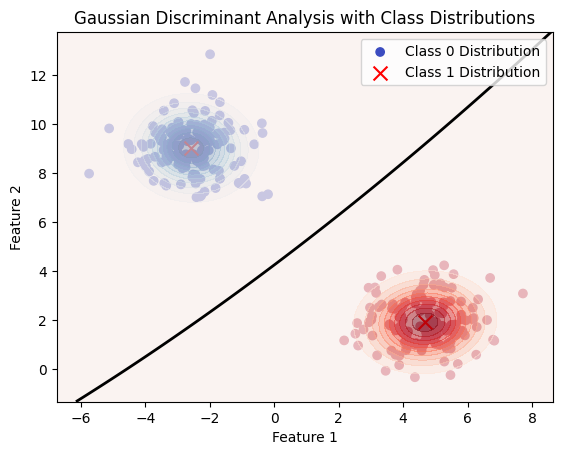

In [15]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(42)
X,y = make_blobs(n_samples=300, n_features=2,
                 centers=2,
                 cluster_std=1.0,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=42,
                 return_centers=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Fit GDA model
gda_custom = GaussianDiscriminantAnalysis()
gda_custom.fit(X_train, y_train)

# Plotting decision boundary and class distributions for custom GDA
gda_custom.plot_distribution(X_train, y_train)


### Non-linearly seperable problem

<ipython-input-2-e9d441f856f6>:65: RuntimeWarning: divide by zero encountered in log
  Z = np.log(Z1) - np.log(Z0) + np.log(self.class_priors[1]) - np.log(self.class_priors[0])


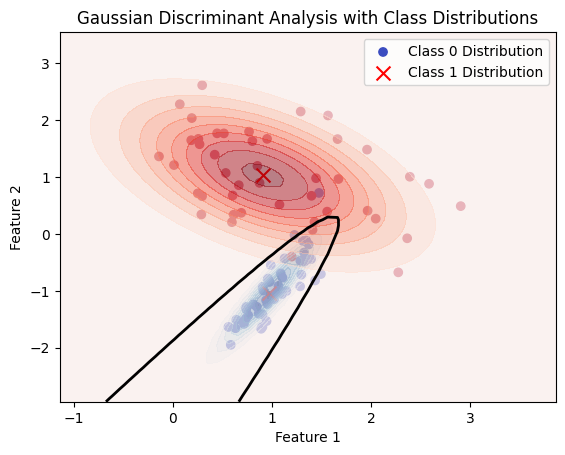

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
# Generate synthetic data
np.random.seed(42)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit GDA model
gda_custom = GaussianDiscriminantAnalysis()
gda_custom.fit(X_train, y_train)

# Plotting decision boundary and class distributions for custom GDA
gda_custom.plot_distribution(X_test, y_test)
